# Les étapes de l'entrainement d'un modèle de machine learning

Pour cette activité, nous allons utiliser les librairies Python suivantes :

- Manipulation de données : [pandas](https://pandas.pydata.org/)

- Visualisation de données : [seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/python/)

- Entrainement d'un modèle de machine learning : [sklearn](https://scikit-learn.org/stable/)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/2560px-Scikit_learn_logo_small.svg.png" alt="drawing" width="200"/>

## Activité de recherche d'informations :

- A quoi servent les jeux de données d'entrainement et de test ?

-  L'objectif est de produire un modèle entraîné (ajusté) qui se généralise bien aux nouvelles données inconnues.

- A quoi sert la standardisation des données ? Quel est le lien avec le z-score ?

- La normalisation standard, également appelée standardisation ou normalisation z-score, consiste à soustraire la moyenne et à la diviser par l'écart type.Dans ce cas, chaque valeur refléterait la distance par rapport à la moyenne en unités d'écart-type.

- Quelles sont les alternatives à la standardisation des données ?

- La transformation en rangs, la normalisation

- Dans la librairie sklearn, les modèles de machine learning sont appelés `estimators`. Ils possèdent (presque) tous les mêmes méthodes. Définir à quoi servent les méthodes d'estimateurs suivant :
    
    - clf.fit(X, y[, sample_weight])

    - The fit() method takes the training data as arguments, which can be one array in the case of unsupervised learning, or two arrays in the case of supervised learning. Note that the model is fitted using X and y , but the object holds no reference to X and y .

    - clf.predict(X)

    - Given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model.predict(X_new)), and returns the learned label for each object in the array.

    - clf.predict_proba(X)
    
    - Returns the probability of the sample for each class in the model, where classes are ordered as they are in self.classes_.

    - clf.score(X, y[, sample_weight])

    - Pour évaluer le modéle on utilise la méthode score. Cette méthode renvoie la mesure par défaut de la qualité du modéle.

- De ma même façon, les étapes de traitements et de transformations des données sont des objets `transformers` dans la librairie sklearn. Ils possèdent (presque) tous les mêmes méthodes. Définir à quoi servent les méthodes de transformeurs suivant :

    - tr.fit(X[, y])
    - tr.transform(X)
    - tr.fit_transform(X[, y])

- Like other estimators, these are represented by classes with a fit method, which learns model parameters (e.g. mean and standard deviation for normalization) from a training set, and a transform method which applies this transformation model to unseen data. fit_transform may be more convenient and efficient for modelling and transforming the training data simultaneously.

1 - Récupérer les données

La librairie pandas permet de récupérer dans des **dataframes** des données de **différents formats** (CSV, JSON, HTML, Excel...) grâce à des fonctions de lecture : https://pandas.pydata.org/docs/user_guide/io.html

Activité :

- Récupérer les données du fichier `data.csv` dans un dataframe pandas

- Vérifier que la récupération des données s'est déroulée correctement

- Transformer les données manquantes en `np.nan`

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")
df.head()

Surface en m2 Nombre de pièces Prix du logement en €
0           113                9                245427
1            78       A vérifier                169906
2            50                3                118167
3            43                2                108141
4            36                1                 86920

In [5]:
#df.strings.str.replace('[^a-zA-Z0-9]', '')

for index, row in df.iterrows():
  try:
      if not row["Nombre de pièces"].isdigit():
        row["Nombre de pièces"] = np.nan
      if not row["Surface en m2"].isdigit():
        row["Surface en m2"] = np.nan
      if not row["Prix du logement en €"].isdigit():
        row["Prix du logement en €"] = np.nan
  except AttributeError:
      pass

# df = df.astype(float)
df

# df_test = df.apply(pd.to_numeric, errors="coerce")
# df_test.describe()
# df_test



Surface en m2 Nombre de pièces Prix du logement en €
0              113                9                245427
1               78              NaN                169906
2               50                3                118167
3               43                2                108141
4               36                1                 86920
...            ...              ...                   ...
9995           119                9                264301
9996            29                1                 69034
9997            48                2                110903
9998            49                3                115224
9999           107                9                234628

[10000 rows x 3 columns]

In [6]:
df.isnull().sum()

Surface en m2             95
Nombre de pièces          89
Prix du logement en €    102
dtype: int64

In [7]:
# cleanDf = df.dropna()
cleanDf = df


cleanDf = cleanDf.astype(float)

In [8]:
cleanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Surface en m2          9905 non-null   float64
 1   Nombre de pièces       9911 non-null   float64
 2   Prix du logement en €  9898 non-null   float64
dtypes: float64(3)
memory usage: 234.5 KB


2 - Analyser les données

- Faire une analyse univariée des données (centralité et distribution)

- Vérifier l'absence de données aberrantes

- Faire une analyse bivariée des données (corrélations)

<AxesSubplot:xlabel='Surface en m2', ylabel='Prix du logement en €'>

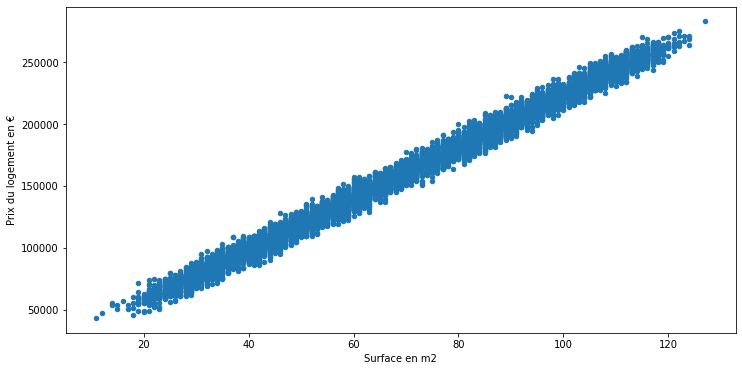

In [9]:
cleanDf.plot.scatter(x="Surface en m2", y="Prix du logement en €",figsize=(12,6))

3 - Préparer les données

Activité :

- Créer un dataframe **X** contenant les caractéristiques sans la valeur cible et créer un dataframe **y** avec la valeur cible

- Séparer le jeu de données en un jeu d'entrainement et un jeu de test grâce à la fonction `train_test_split()` de sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

- *A but pédagogique* : Vérifier les proportions de données dans le jeu d'entrainement et de test

- Traiter les données manquantes dans le jeu d'entrainement à partir de la fonction `SimpleImputer()` de sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

- Vérifier le bon fonctionnement de la fonction

- Standardiser les données du jeu d'entrainement à l'aide de la fonction `StandardScaler()` de sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

- *A but pédagogique* : vérifier la standardisation des données sans sklearn (calcul de z-score)

- Appliquer les transformations de traitement des données manquantes et de standardisation sur le jeu de test

In [10]:
from sklearn.model_selection import train_test_split

X = cleanDf[['Surface en m2', 'Nombre de pièces']]
y = cleanDf[['Prix du logement en €']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(len(X_train),len(X_test),len(y_train),len(y_test))

8000 2000 8000 2000


In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 6252 to 6929
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surface en m2     1984 non-null   float64
 1   Nombre de pièces  1981 non-null   float64
dtypes: float64(2)
memory usage: 46.9 KB


4 - Entrainer le modèle

Activité :

- Créer une instance de la classe `LinearRegression` de sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Entrainer ce modèle de régression linéaire à l'aide du jeu d'entrainement

In [12]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
X = pd.DataFrame(imp_mean.transform(X))
imp_mean.fit(y)
y = pd.DataFrame(imp_mean.transform(y))
y

0
0     245427.0
1     169906.0
2     118167.0
3     108141.0
4      86920.0
...        ...
9995  264301.0
9996   69034.0
9997  110903.0
9998  115224.0
9999  234628.0

[10000 rows x 1 columns]

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X))
print(scaler.mean_)
scaler.transform(X)

StandardScaler()
[70.02402827  4.99253355]


array([[ 1.63956611,  1.55658881],
       [ 0.30428941,  0.        ],
       [-0.76393196, -0.7739442 ],
       ...,
       [-0.84023348, -1.16236637],
       [-0.80208272, -0.7739442 ],
       [ 1.41066153,  1.55658881]])

5 - Evaluer le modèle

Activité :

- Calculer la métrique R2 sur les données de test

- *A but pédagogique* : retrouver cette valeur sans la librairie sklearn

- Caluler la métrique R2 sur les données d'entrainement et comparer avec le R2 calculé précédemment

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9753733842555153

6 - Inférence

Activité :

- Faire une prédiction du prix d'un bien immobilier de 4 pièces et 42 m2

- Enregistrer le modèle entrainé dans un fichier `immobilier.joblib` : https://scikit-learn.org/stable/modules/model_persistence.html

- Dans un autre notebook, récupérer le modèle entrainé et effectuer une prédiction

In [20]:
app1 = [[42, 4]]
app1 = scaler.transform(app1)
print(reg.predict(app1))

#Sauvegarde model
from joblib import dump

dump(reg, "immobilier.joblib")
dump(scaler, "scaler.joblib")

[[22357.32707471]]


['scaler.joblib']

7 - Conclusion

Quelles sont les problèmatiques rencontrées dans ce workflow de machine learning ?

Quels sont les avantages et les inconvénients de la fonction `train_test_split()` ?